# Section B - From-Scratch Implementations

## Logistic Regression Variants

#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


#### Importing the dataset

In [2]:
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
names_list = pd.read_csv("names_list.csv")

X_mean = np.mean(X_train, axis=0)
X_std = np.std(X_train)
X_normalized = (X_train - X_mean) / X_std
X_bias_normalized = np.c_[np.ones((X_normalized.shape[0], 1)), X_normalized]

X_test_normalized = (X_test - X_mean) / X_std
X_test_bias_normalized = np.c_[np.ones((X_test_normalized.shape[0], 1)), X_test_normalized]

c:\Application\envs\miniproject\lib\site-packages\numpy\_core\fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


###  Standard Logistic Regression (no regularisation)

#### Implementing Logistics Regression

In [3]:
class LogisticRegression:

    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.theta = None
    

    def sigmoid(self, z):
        z = np.array(z)
        return 1 / (1 + np.exp(-z))
    
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        cost_history = []
        
        
        for i in range(self.n_iterations): 
            z = X.dot(self.theta)
            h = self.sigmoid(z)
            epsilon = 1e-15
            gradients = (1/m) * X.T.dot(h - y)
            self.theta -= self.learning_rate * gradients
            cost = (-1/m) * ((np.sum(y * np.log(h + epsilon))) + np.sum((1 - y) * np.log(1 - h + epsilon)))
            cost_history.append(cost)

            if i % 100 == 0:
           
                print(f"Iteration {i}: Cost = {cost} Theta = {self.theta.ravel()}")

        plt.plot(cost_history)
        plt.title("Cost Variation")
        plt.xlabel("iterations")
        plt.ylabel("Cost")
        plt.show()
        
    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(X.dot(self.theta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    


## Implementing L1 Regularised Logistic Regression

In [4]:
class LogisticRegressionL1:

    def __init__(self, learning_rate=0.01, n_iterations=1000,lambda_l1 = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_l1 = lambda_l1
        self.theta = None
    

    def sigmoid(self, z):
        z = np.array(z)
        return 1 / (1 + np.exp(-z))
    
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        cost_history = []
        

        
        for i in range(self.n_iterations): 

            z = X.dot(self.theta)
            h = self.sigmoid(z)
            epsilon = 1e-15
            

             # L1 regularization gradient
            sign_theta = np.where(self.theta >= 0, 1, -1)
            sign_theta[0] = 0 
            gradients = (1/m) * X.T.dot(h - y) + self.lambda_l1 * sign_theta

            self.theta -= self.learning_rate * gradients

            cost = (-1/m) * (np.sum(y * np.log(h + epsilon)) + np.sum((1 - y) * np.log(1 - h + epsilon)))
            l1_penalty = self.lambda_l1 * np.sum(np.abs(self.theta))
            total_cost = cost + l1_penalty
            cost_history.append(total_cost)

            if i % 100 == 0:
           
                print(f"Iteration {i}: Cost = {cost} Theta = {self.theta.ravel()}")

        plt.plot(cost_history)
        plt.title("Cost Variation")
        plt.xlabel("iterations")
        plt.ylabel("Cost")
        plt.show()
        
    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(X.dot(self.theta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    


## Implementing L2 Regularised Logistic Regression

In [5]:
class LogisticRegressionL2:

    def __init__(self, learning_rate=0.01, n_iterations=1000,lambda_l2 = 1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.lambda_l2 = lambda_l2
        self.theta = None
    

    def sigmoid(self, z):
        z = np.array(z)
        return 1 / (1 + np.exp(-z))
    
    
    def fit(self, X, y):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        m, n = X.shape
        self.theta = np.zeros((n, 1))
        cost_history = []

        for i in range(self.n_iterations): 
            z = X.dot(self.theta)
            h = self.sigmoid(z)
            epsilon = 1e-15

            # Gradient
            gradients = (1/m) * X.T.dot(h - y)
            gradients[1:] += self.lambda_l2 * self.theta[1:]

            self.theta -= self.learning_rate * gradients

            # Cost with L2 penalty 
            cost = (-1/m) * (np.sum(y * np.log(h + epsilon)) + np.sum((1 - y) * np.log(1 - h + epsilon)))
            l2_penalty = self.lambda_l2 * np.sum(self.theta[1:]**2)
            total_cost = cost + l2_penalty
            cost_history.append(total_cost)

            if i % 100 == 0:
                print(f"Iteration {i}: Cost = {cost} Theta = {self.theta.ravel()}")

        plt.plot(cost_history)
        plt.title("Cost Variation")
        plt.xlabel("iterations")
        plt.ylabel("Cost")
        plt.show()

        
    def predict_proba(self, X):
        X = np.c_[np.ones((X.shape[0], 1)), X]
        return self.sigmoid(X.dot(self.theta))
    
    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    


## Decision Trees Implementation

In [6]:
# Decision Tree from Scratch
class TreeNode:
    def __init__(self):
        self.feature_index = None
        self.threshold = None
        self.left = None
        self.right = None
        self.prediction = None
        self.probabilities = None

class DecisionTree:
    def __init__(self, maximum_depth=5, criterion='gini'):
        self.maximum_depth = maximum_depth
        self.criterion = criterion
        self.tree = None
    
    def _impurity(self, y):
        if len(y) == 0:
            return 0
        counts = Counter(y)
        n = len(y)
        
        if self.criterion == 'gini':
            return 1 - sum((count/n)**2 for count in counts.values())
        else:  # entropy
            return -sum((count/n) * np.log2(count/n) for count in counts.values() if count > 0)
    
    def _best_split(self, X, y):
        best_gain, best_feature, best_threshold = 0, None, None
        current_impurity = self._impurity(y)
        
        for feature_idx in range(X.shape[1]):
            values = X.iloc[:, feature_idx].unique()
            for val in values:
                left_mask = X.iloc[:, feature_idx] <= val
                if left_mask.sum() == 0 or left_mask.sum() == len(y):
                    continue
                
                y_left, y_right = y[left_mask], y[~left_mask]
                gain = current_impurity - (len(y_left)/len(y) * self._impurity(y_left) + 
                                          len(y_right)/len(y) * self._impurity(y_right))
                
                if gain > best_gain:
                    best_gain, best_feature, best_threshold = gain, feature_idx, val
        
        return best_feature, best_threshold
    
    def _build_tree(self, X, y, depth=0):
        node = TreeNode()
        node.prediction = Counter(y).most_common(1)[0][0]
        node.probabilities = np.mean(y)   # works if y is 0/1

        
        if depth >= self.maximum_depth or len(set(y)) == 1:
            return node
        
        feature_idx, threshold = self._best_split(X, y)
        if feature_idx is None:
            return node
        
        node.feature_index, node.threshold = feature_idx, threshold
        left_mask = X.iloc[:, feature_idx] <= threshold
        
        node.left = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        node.right = self._build_tree(X[~left_mask], y[~left_mask], depth + 1)
        
        return node
    
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
        return self
    
    def _predict_sample(self, sample, node):
        if node.feature_index is None:
            return node.prediction
        
        if sample[node.feature_index] <= node.threshold:
            return self._predict_sample(sample, node.left)
        else:
            return self._predict_sample(sample, node.right)
    
    def _predict_proba_sam(self, sample, node):
        if node.left is None and node.right is None:
            return node.probabilities
        
        if sample[node.feature_index] <= node.threshold:
            return self._predict_proba_sam(sample, node.left)
        else:
            return self._predict_proba_sam(sample, node.right)
    
    def predict(self, X):
        return np.array([self._predict_sample(X.iloc[i], self.tree) for i in range(len(X))])
    
    def predict_proba(self, X):
        return np.array([self._predict_proba_sam(X.iloc[i], self.tree) for i in range(len(X))])


## Bagging implementation

In [7]:
class SimpleBagging:
    def __init__(self, n_estimator=10):
        self.n_estimator = n_estimator
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        n_samples = X.shape[0]

        for _ in range(self.n_estimator):
            # Create bootstrap sample
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_bootstrap = X.iloc[indices] if isinstance(X, pd.DataFrame) else X[indices]
            y_bootstrap = y[indices]

            # Train tree
            tree = DecisionTree(maximum_depth=3)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)

    def predict(self, X):
        # Aggregate predictions
        all_preds = np.array([tree.predict(X) for tree in self.trees])
        # Majority vote along axis 0
        return np.array([Counter(col).most_common(1)[0][0] for col in all_preds.T])
    
    def predict_proba(self, X):
        # Aggregate probabilities
        all_preds = np.array([tree.predict_proba(X) for tree in self.trees])
        # Average probabilities along axis 0
        return np.mean(all_preds, axis=0)
    


## Adaboost Implementation


In [8]:
class DescisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None


    def predict(self, X):
        n_samples = X.shape[0]
        X_column = X[:, self.feature_index]
        predictions = np.ones(n_samples)
        if self.polarity == 1:
            predictions[X_column < self.threshold] = -1
        else:
            predictions[X_column > self.threshold] = -1
        return predictions
    
class AdaBoost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf
        self.clfs = []

    def fit(self, X, y):

        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape
        # Initialize weights to 1/N
        w = np.full(n_samples, (1 / n_samples))
        self.clfs = []
        for _ in range(self.n_clf):
            clf = DescisionStump()
            min_error = float('inf')

            # Find the best decision stump
            for feature_i in range(n_features):
                X_column = X[:, feature_i]
                thresholds = np.unique(X_column)
                for threshold in thresholds:
                    p = 1
                    predictions = np.ones(n_samples)
                    predictions[X_column < threshold] = -1

                    missclassified = w[y != predictions]
                    error = sum(missclassified)

                    if error > 0.5:
                        error = 1 - error
                        p = -1  

                    if error < min_error:
                        clf.polarity = p
                        clf.threshold = threshold
                        clf.feature_index = feature_i
                        min_error = error

            EPS = 1e-10
            # Compute alpha
            clf.alpha = 0.5 * np.log((1.0 - min_error) / (min_error + EPS))
            # Update weights
            predictions = clf.predict(X)
            w *= np.exp(-clf.alpha * y * predictions)
            w /= np.sum(w)

            self.clfs.append(clf)

    def predict(self, X):
        X = np.array(X)
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        y_pred = np.sum(clf_preds, axis=0)
        y_pred = np.sign(y_pred)
        return y_pred
    
    def predict_proba(self, X):
        X = np.array(X)
        clf_preds = [clf.alpha * clf.predict(X) for clf in self.clfs]
        return np.sum(clf_preds, axis=0)
        
        
        

### Evaluation Metrics

In [9]:
class EvaluationMetrics:

    def __init__(self, y, y_pred, y_prob):
        self.y = y
        self.y_pred = y_pred
        self.y_prob = y_prob

    
    def compute_confusion_matrix(self):
        TP = np.sum((self.y == 1) & (self.y_pred == 1))
        FP = np.sum((self.y == 0) & (self.y_pred == 1))
        TN = np.sum((self.y == 0) & (self.y_pred == 0))
        FN = np.sum((self.y == 1) & (self.y_pred == 0))
        return np.array(
                        [
                        [TN, FP],
                        [FN, TP]
                        ],
                        dtype=int
                        )
    
    def precision_score(self, cm):
        TP = cm[1,1]
        FP = cm[0,1]
        return TP / (TP + FP) if (TP + FP) != 0 else 0
    
    def recall_score(self, cm):
        TP = cm[1,1]
        FN = cm[1,0]
        return TP / (TP + FN) if (TP + FN) != 0 else 0
    
    def accuracy(self, cm):
        TP = cm[1,1]
        FP = cm[0,1]
        FN = cm[1,0]
        TN = cm[0,0]
        return (TP + TN) / (TP + TN + FP + FN)
    
    def f1_score(self, cm):
        p = self.precision_score(cm)
        r = self.recall_score(cm) 
        return (2 * p * r) / (p + r)
    
    def roc_curve(self):
    # Ensure both are 1D arrays
        y_true = np.ravel(self.y)
        y_prob = np.ravel(self.y_prob)

        thresholds = np.linspace(0, 1, 200)
        tpr_list = []
        fpr_list = []

        for t in thresholds:
            y_pred_thresh = (y_prob >= t).astype(int)

            TP = np.sum((y_true == 1) & (y_pred_thresh == 1))
            FP = np.sum((y_true == 0) & (y_pred_thresh == 1))
            TN = np.sum((y_true == 0) & (y_pred_thresh == 0))
            FN = np.sum((y_true == 1) & (y_pred_thresh == 0))

            tpr = TP / (TP + FN) if (TP + FN) != 0 else 0
            fpr = FP / (FP + TN) if (FP + TN) != 0 else 0

            tpr_list.append(tpr)
            fpr_list.append(fpr)

        return np.array(tpr_list), np.array(fpr_list), np.array(thresholds)


        
    def compute_evaluation_metrics(self):
        cm = self.compute_confusion_matrix()
        print("Confusion Matrix:\n", cm)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
        plt.xlabel('y_prob')
        plt.ylabel('Y')
        plt.title('Confusion Matrix')
        plt.show()

        p = self.precision_score(cm)
        r = self.recall_score(cm) 
        f1 = self.f1_score(cm)
        acc = self.accuracy(cm)

        print(f"Precision : {p}")
        print(f"Recall : {r}")
        print(f"F1 Score : {f1}")
        print(f"Accuracy : {acc}")

        tpr, fpr, _ = self.roc_curve()
        
        plt.plot(fpr, tpr, label='LogReg')
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title("ROC Curve")
        plt.show()

    

c:\Application\envs\miniproject\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Iteration 0: Cost = Survived    0.693147
dtype: float64 Theta = [-0.00123596 -0.00155883 -0.00262469 -0.0002354  -0.00023062  0.0003794
  0.00119493  0.00044247]
Iteration 100: Cost = Survived    0.599884
dtype: float64 Theta = [-0.11047985 -0.13063314 -0.22959559 -0.02502239 -0.02579739  0.02584271
  0.09349362  0.03760676]
Iteration 200: Cost = Survived    0.549023
dtype: float64 Theta = [-0.19604168 -0.22116362 -0.40154947 -0.05051843 -0.05305325  0.03445625
  0.14871092  0.0638456 ]
Iteration 300: Cost = Survived    0.518851
dtype: float64 Theta = [-0.26401806 -0.28823483 -0.53549051 -0.07520739 -0.07935357  0.03396962
  0.18317924  0.08271331]
Iteration 400: Cost = Survived    0.499701
dtype: float64 Theta = [-0.31896392 -0.34046447 -0.64233079 -0.0984791  -0.1037746   0.02859604
  0.20537194  0.09650732]
Iteration 500: Cost = Survived    0.486901
dtype: float64 Theta = [-0.36410193 -0.38283048 -0.72919145 -0.12014802 -0.126108    0.02067503
  0.21987387  0.10671554]
Iteration 600

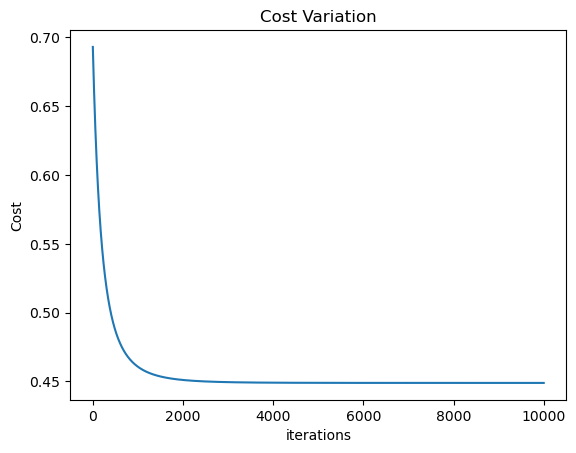

Confusion Matrix:
 [[89 16]
 [20 54]]


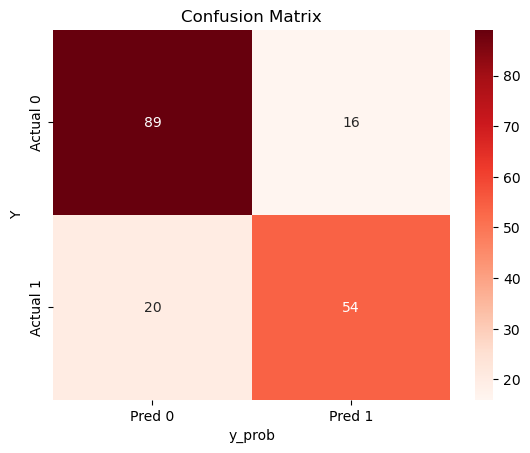

Precision : 0.7714285714285715
Recall : 0.7297297297297297
F1 Score : 0.75
Accuracy : 0.7988826815642458


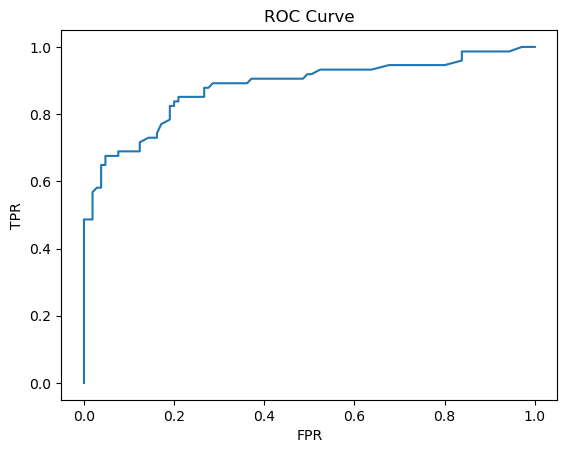

In [10]:
model = LogisticRegression(learning_rate=0.01, n_iterations=10000)
model.fit(X_normalized, y_train)

y_pred_prob = model.predict_proba(X_test_normalized)
y_pred_class = model.predict(X_test_normalized)

y_test_array = y_test.to_numpy().ravel() if hasattr(y_test, "to_numpy") else y_test.ravel()

# Flatten y_pred_class if needed
y_pred_array = y_pred_class.ravel()


# Evaluate
model_evaluation = EvaluationMetrics(y_test_array, y_pred_array,y_pred_prob)
model_evaluation.compute_evaluation_metrics()



In [11]:
print("Predicted probabilities:", y_pred_prob.ravel())
print("Predicted classes:", y_pred_class.ravel())

print(np.unique(y_pred_prob))

Predicted probabilities: [0.08692308 0.2207872  0.12891142 0.89948836 0.71333258 0.94212715
 0.72979123 0.08453134 0.79842875 0.93304915 0.34171468 0.06439523
 0.38576511 0.11848387 0.19563805 0.94702438 0.3064608  0.72983408
 0.24479305 0.33977362 0.11523539 0.4208501  0.62667615 0.12931251
 0.10453045 0.06228595 0.42977892 0.22196962 0.07445143 0.61029154
 0.1325283  0.67600148 0.5270608  0.63261181 0.13629001 0.09932127
 0.47420862 0.72979123 0.94023662 0.10284634 0.1984373  0.07490135
 0.10288539 0.15228196 0.53180837 0.08504507 0.13261112 0.11891073
 0.11499898 0.29797777 0.68784521 0.82773042 0.0363825  0.53072868
 0.05227514 0.94336593 0.21534607 0.93049704 0.79420443 0.78264079
 0.12532507 0.87337431 0.78143779 0.46766271 0.15228196 0.65012563
 0.31667313 0.09993385 0.11683332 0.86644496 0.77217263 0.94843764
 0.54246323 0.89852022 0.11851722 0.06216541 0.71377399 0.9441311
 0.7743033  0.4822064  0.04448662 0.81952258 0.9080333  0.15227754
 0.31320548 0.22930471 0.93314832 0.94

## Logistics Regression L1

Iteration 0: Cost = Survived    0.693147
dtype: float64 Theta = [-1.23595506e-03 -1.00015588e+01 -1.00026247e+01 -1.00002354e+01
 -1.00002306e+01 -9.99962060e+00 -9.99880507e+00 -9.99955753e+00]


c:\Application\envs\miniproject\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Iteration 100: Cost = Survived    0.562736
dtype: float64 Theta = [-0.14698197  9.7477365   9.64444411 -9.97891756 -9.94871932 -9.88057318
 -9.79959137 -9.89942944]
Iteration 200: Cost = Survived    0.517283
dtype: float64 Theta = [-0.27507262  9.53095538  9.33501358 -9.96152737 -9.90980237 -9.78495367
 -9.63413824 -9.80966064]
Iteration 300: Cost = Survived    0.512697
dtype: float64 Theta = [-0.3902061   9.33538072  9.05622245 -9.94582479 -9.87798373 -9.70335364
 -9.48592783 -9.72544696]
Iteration 400: Cost = Survived    0.528999
dtype: float64 Theta = [-0.49662551  9.151952    8.79777514 -9.93072718 -9.84994259 -9.6300631
 -9.34695477 -9.64428993]
Iteration 500: Cost = Survived    0.556948
dtype: float64 Theta = [-0.5973036   8.97576823  8.55338978 -9.91576275 -9.82382648 -9.5618754
 -9.21336642 -9.56475364]
Iteration 600: Cost = Survived    0.591884
dtype: float64 Theta = [-0.69413394  8.80415413  8.31914837 -9.90073346 -9.7986151  -9.49694644
 -9.08314889 -9.48598966]
Iteration 70

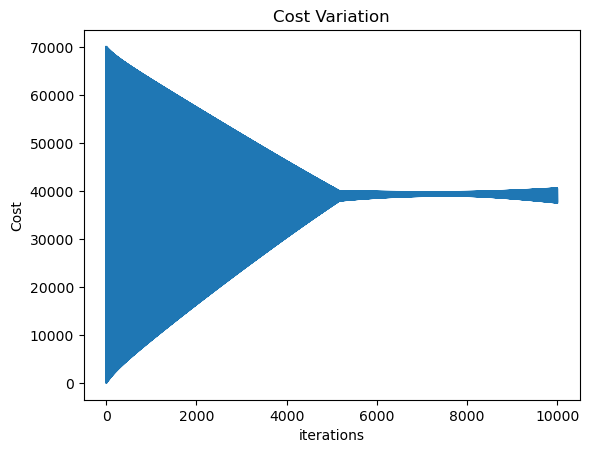

Confusion Matrix:
 [[82 23]
 [31 43]]


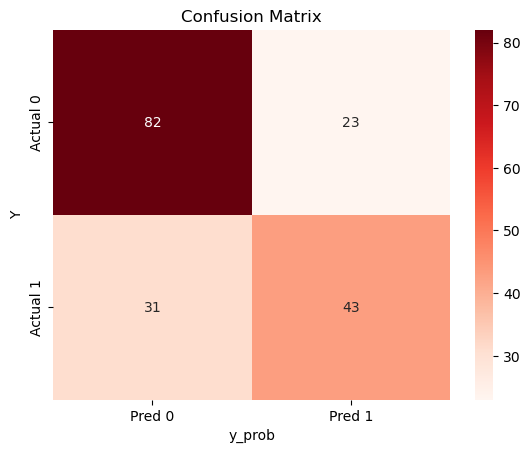

Precision : 0.6515151515151515
Recall : 0.581081081081081
F1 Score : 0.6142857142857142
Accuracy : 0.6983240223463687


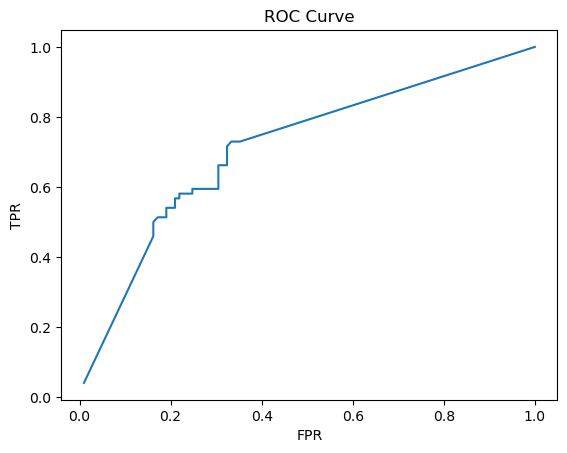

In [12]:
model_l1 = LogisticRegressionL1(learning_rate=0.01, lambda_l1=1000,n_iterations=10000)
model_l1.fit(X_normalized, y_train)

y_pred_prob_l1 = model_l1.predict_proba(X_test_normalized)
y_pred_class_l1 = model_l1.predict(X_test_normalized)

y_test_array_l1 = y_test.to_numpy().ravel() if hasattr(y_test, "to_numpy") else y_test.ravel()

# Flatten y_pred_class if needed
y_pred_array_l1 = y_pred_class_l1.ravel()


# Evaluate
model_evaluation_l1 = EvaluationMetrics(y_test_array_l1, y_pred_array_l1,y_pred_prob_l1)
model_evaluation_l1.compute_evaluation_metrics()

[[0.08692308]
 [0.2207872 ]
 [0.12891142]
 [0.89948836]
 [0.71333258]
 [0.94212715]
 [0.72979123]
 [0.08453134]
 [0.79842875]
 [0.93304915]]


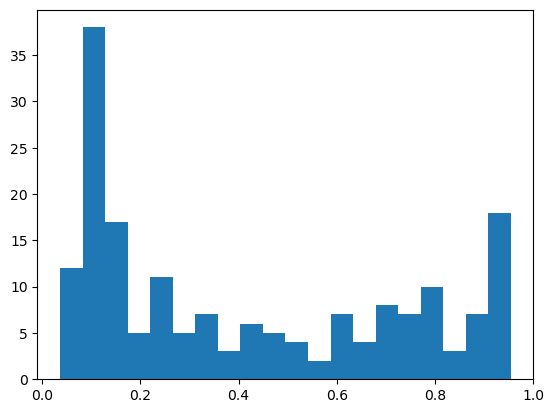

In [13]:
print(y_pred_prob[:10])
plt.hist(y_pred_prob, bins=20)
plt.show()

## L2 Logistics Regression

c:\Application\envs\miniproject\lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Iteration 0: Cost = Survived    0.693147
dtype: float64 Theta = [-0.00123596 -0.00155883 -0.00262469 -0.0002354  -0.00023062  0.0003794
  0.00119493  0.00044247]
Iteration 100: Cost = Survived    0.600202
dtype: float64 Theta = [-0.11048016 -0.13001999 -0.22850325 -0.02489622 -0.02566563  0.0257316
  0.09306424  0.03742955]
Iteration 200: Cost = Survived    0.549818
dtype: float64 Theta = [-0.19604365 -0.21919384 -0.39789695 -0.0500124  -0.05251326  0.03421938
  0.14743504  0.0632759 ]
Iteration 300: Cost = Survived    0.520042
dtype: float64 Theta = [-0.26401481 -0.28453749 -0.52846512 -0.07409092 -0.07815414  0.03373624
  0.18094238  0.08165848]
Iteration 400: Cost = Survived    0.501187
dtype: float64 Theta = [-0.31893171 -0.33482685 -0.6314825  -0.09655546 -0.10170537  0.02853627
  0.20217202  0.09493741]
Iteration 500: Cost = Survived    0.488598
dtype: float64 Theta = [-0.36400139 -0.37511657 -0.71428695 -0.11725257 -0.12299654  0.02096018
  0.21575852  0.10463479]
Iteration 600:

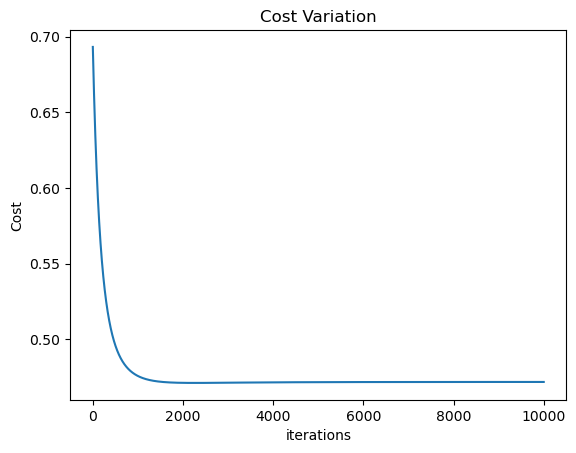

Confusion Matrix:
 [[89 16]
 [20 54]]


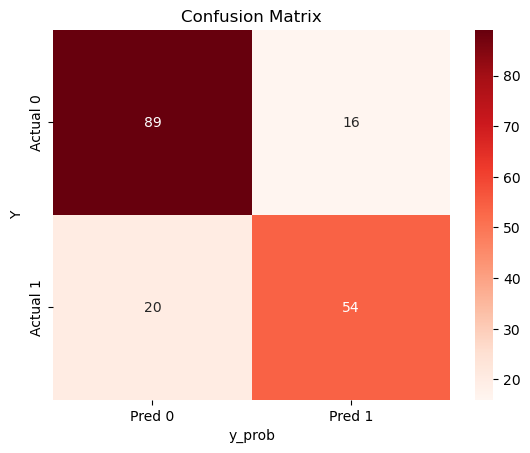

Precision : 0.7714285714285715
Recall : 0.7297297297297297
F1 Score : 0.75
Accuracy : 0.7988826815642458


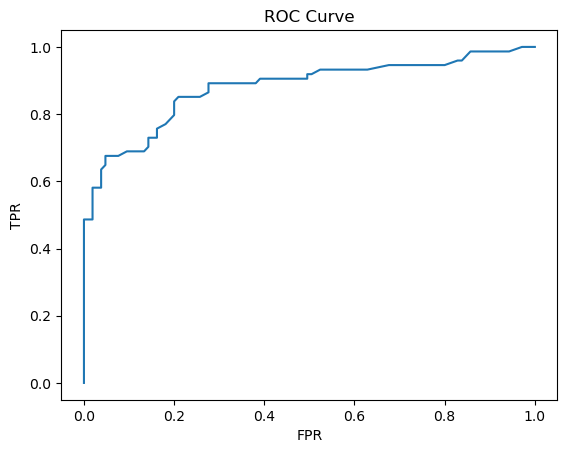

In [14]:
model_l2 = LogisticRegressionL2(learning_rate=0.01, lambda_l2=0.01,n_iterations=10000)
model_l2.fit(X_normalized, y_train)

y_pred_prob_l2 = model_l2.predict_proba(X_test_normalized)
y_pred_class_l2 = model_l2.predict(X_test_normalized)

y_test_array_l2 = y_test.to_numpy().ravel() if hasattr(y_test, "to_numpy") else y_test.ravel()

# Flatten y_pred_class if needed
y_pred_array_l2 = y_pred_class_l2.ravel()


# Evaluate
model_evaluation_l2 = EvaluationMetrics(y_test_array_l2, y_pred_array_l2,y_pred_prob_l2)
model_evaluation_l2.compute_evaluation_metrics()

In [15]:
y_train_array = y_train.to_numpy().ravel()
y_test_array  = y_test.to_numpy().ravel()

# y_train_array_ada = y_train_array.copy()
# y_test_array_ada = y_test_array.copy()

# # Replace 0 with -1
# y_train_array_ada = np.where(y_train_array == 0, -1, 1)
# y_test_array_ada = np.where(y_test_array == 0, -1, 1)


tree_shallow = DecisionTree(maximum_depth=1)
tree_shallow.fit(X_normalized, y_train_array)


tree_deep = DecisionTree(maximum_depth=12)
tree_deep.fit(X_normalized, y_train_array)

bagging = SimpleBagging(n_estimator=10)
bagging.fit(X_normalized, y_train_array)

# adaboost = AdaBoost(n_clf=10)
# adaboost.fit(X_normalized, y_train_array_ada)


P_shallow = tree_shallow.predict(X_test_normalized)
prob_shallow = tree_shallow.predict_proba(X_test_normalized)
P_deep = tree_deep.predict(X_test_normalized)
prob_deep = tree_deep.predict_proba(X_test_normalized)
P_bagging = bagging.predict(X_test_normalized)
prob_bag = bagging.predict_proba(X_test_normalized)
# p_adaboost = np.where(adaboost.predict(X_test_normalized) == -1, 0, 1)
# prob_adaboost = adaboost.predict_proba(X_test_normalized)

P_shallow_array = np.array(P_shallow).ravel()
P_deep_array    = np.array(P_deep).ravel()
P_bagging_array = np.array(P_bagging).ravel()



# Adaboost Implementation because of label issue 
y_train_array_ada = y_train_array.copy()
y_test_array_ada = y_test_array.copy()

# Replace 0 with -1
y_train_array_ada = np.where(y_train_array == 0, -1, 1)
y_test_array_ada = np.where(y_test_array == 0, -1, 1)

adaboost = AdaBoost(n_clf=2)
adaboost.fit(X_normalized, y_train_array_ada)

p_adaboost = np.where(adaboost.predict(X_test_normalized) == -1, 0, 1)
prob_adaboost = adaboost.predict_proba(X_test_normalized)
P_adaboost_array = np.array(p_adaboost).ravel()

for i, clf in enumerate(adaboost.clfs):
    print(f"Stump {i}: feature={clf.feature_index}, threshold={clf.threshold}, polarity={clf.polarity}, alpha={clf.alpha}")
print("Unique predictions:", np.unique(P_adaboost_array))
# print("Unique labels in training set (should be -1 and 1):", np.unique(y_train_array_ada))







C:\Users\e T E CH\AppData\Local\Temp\ipykernel_13924\2494618476.py:77: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sample[node.feature_index] <= node.threshold:
C:\Users\e T E CH\AppData\Local\Temp\ipykernel_13924\2494618476.py:86: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if sample[node.feature_index] <= node.threshold:


Stump 0: feature=1, threshold=0.7243102012714984, polarity=-1, alpha=0.6562205341181319
Stump 1: feature=2, threshold=-2.169743177263225, polarity=-1, alpha=0.9217759271333479
Unique predictions: [0 1]


### Shallow Tree Evaluation

[0 0 0 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1]
Confusion Matrix:
 [[88 17]
 [22 52]]


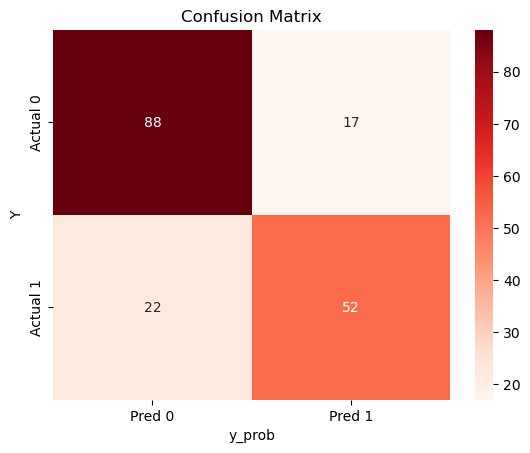

Precision : 0.7536231884057971
Recall : 0.7027027027027027
F1 Score : 0.7272727272727273
Accuracy : 0.7821229050279329


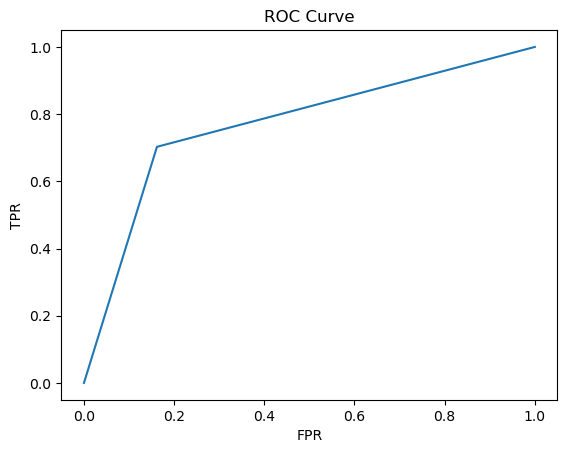

In [16]:

print(P_shallow_array)

eval_shallow = EvaluationMetrics(y_test_array, P_shallow_array, prob_shallow)
eval_shallow.compute_evaluation_metrics()

### Deep Tree Evaluation

[0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 1 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1
 0 1 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0]
Confusion Matrix:
 [[90 15]
 [26 48]]


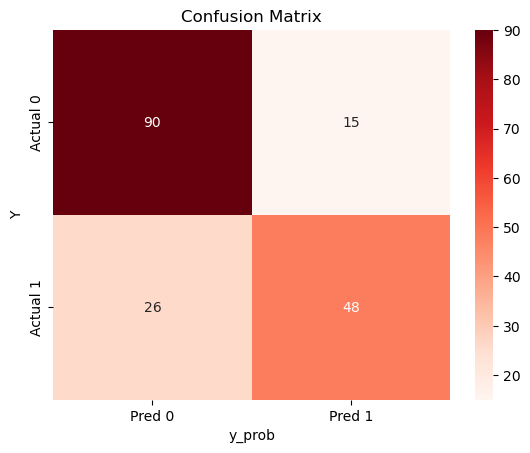

Precision : 0.7619047619047619
Recall : 0.6486486486486487
F1 Score : 0.7007299270072993
Accuracy : 0.770949720670391


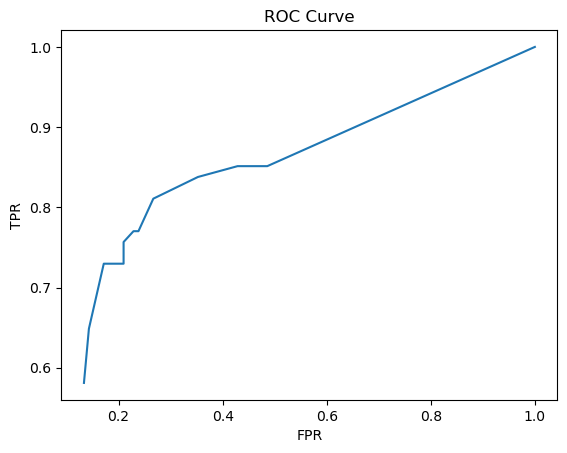

In [17]:

print(P_deep_array)

eval_deep = EvaluationMetrics(y_test_array, P_deep_array, prob_deep)
eval_deep.compute_evaluation_metrics()

### Bagging Method Evaluation

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
Confusion Matrix:
 [[92 13]
 [23 51]]


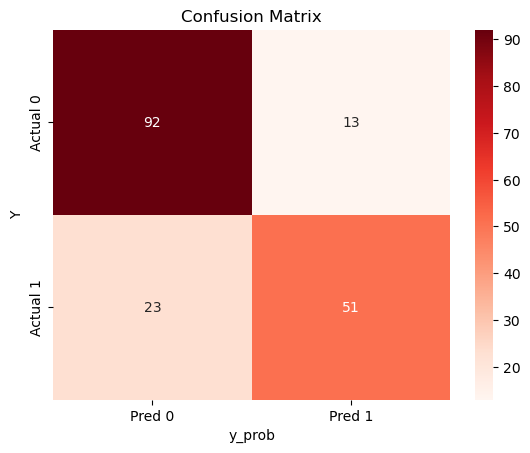

Precision : 0.796875
Recall : 0.6891891891891891
F1 Score : 0.7391304347826088
Accuracy : 0.7988826815642458


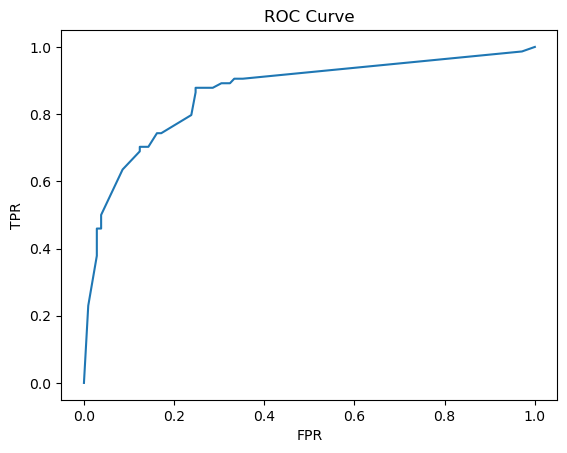

In [18]:

print(P_bagging_array)

eval_bagging = EvaluationMetrics(y_test_array, P_bagging_array, prob_bag)
eval_bagging.compute_evaluation_metrics()

## Adaboost Evaluation

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Confusion Matrix:
 [[ 0  0]
 [73  1]]


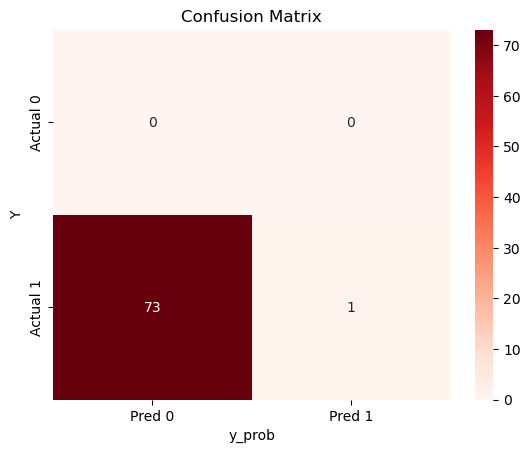

Precision : 1.0
Recall : 0.013513513513513514
F1 Score : 0.026666666666666665
Accuracy : 0.013513513513513514


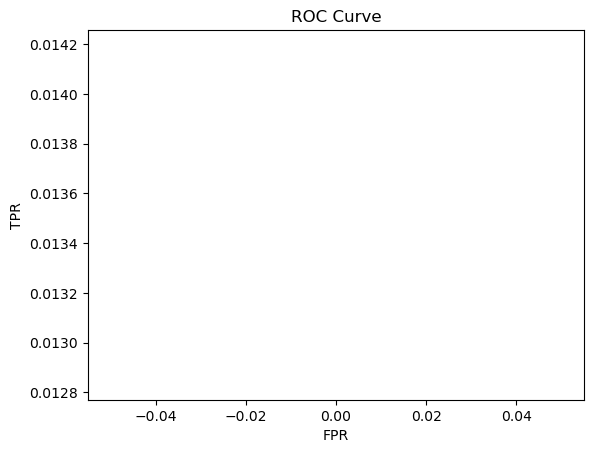

In [19]:
print(P_adaboost_array)

eval_adaboost = EvaluationMetrics(y_test_array_ada, P_adaboost_array, prob_adaboost)
eval_adaboost.compute_evaluation_metrics()

In [20]:
print("Unique labels in y_train_array:", np.unique(y_train_array))
print("Counts:", np.bincount(y_train_array))


print("Unique labels in y_train_array_ada:", np.unique(y_train_array_ada))


Unique labels in y_train_array: [0 1]
Counts: [444 268]
Unique labels in y_train_array_ada: [-1  1]
